In [1]:
import sys
sys.path.append("..")

import scprep
import numpy as np
np.set_printoptions(precision=3, suppress=True)
from blog_tools import data, quantify, embed
%matplotlib inline

dataset = data.trajectory(size=2000, seed=45, bcv_common=0.2, path_skew=0.5)

algorithms = embed.__all__

/home/scottgigante/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:92: UserWarning: Building a kNNGraph on data of shape (2000, 10000) is expensive. Consider setting n_pca.
  data.shape), UserWarning)


PCA [0.007 0.003 0.282 0.168 0.578]


/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:92: UserWarning: Building a kNNGraph on data of shape (2000, 10000) is expensive. Consider setting n_pca.
  data.shape), UserWarning)


MDS [0.007 0.002 0.336 0.204 0.586]


/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:92: UserWarning: Building a kNNGraph on data of shape (2000, 10000) is expensive. Consider setting n_pca.
  data.shape), UserWarning)


ISOMAP [0.004 0.002 0.34  0.198 0.815]


/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:92: UserWarning: Building a kNNGraph on data of shape (2000, 10000) is expensive. Consider setting n_pca.
  data.shape), UserWarning)


TSNE [0.008 0.004 0.388 0.235 0.758]


/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:92: UserWarning: Building a kNNGraph on data of shape (2000, 10000) is expensive. Consider setting n_pca.
  data.shape), UserWarning)


UMAP [0.007 0.003 0.357 0.218 0.814]


/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:92: UserWarning: Building a kNNGraph on data of shape (2000, 10000) is expensive. Consider setting n_pca.
  data.shape), UserWarning)


PHATE [0.011 0.003 0.348 0.207 0.712]


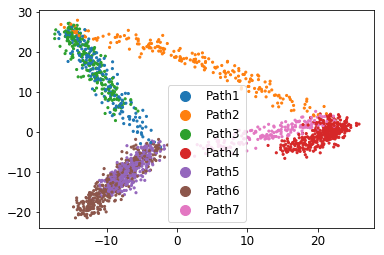

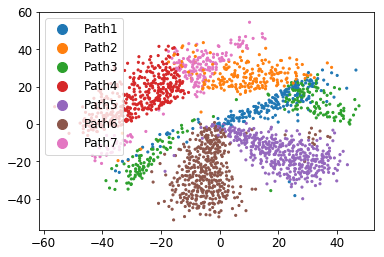

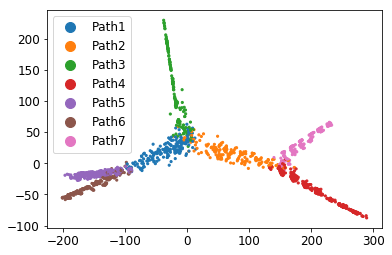

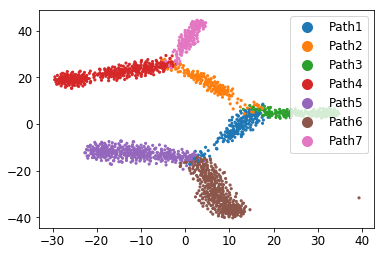

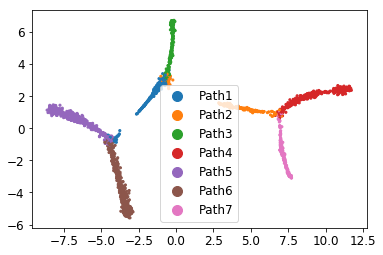

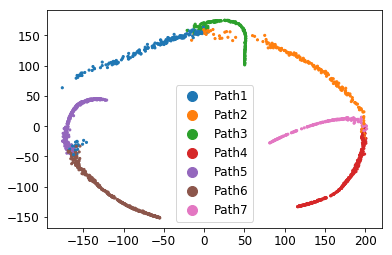

In [2]:
X = scprep.reduce.pca(dataset.X, 100)

for algorithm in algorithms:
    Y = algorithm(X)[:,:2]
    scprep.plot.scatter2d(Y, dataset.c)
    onenn = quantify.shared_neighbors(dataset.X, Y, knn=2)
    onenn_true = quantify.shared_neighbors(dataset.X_true, Y, knn=2)
    auc = quantify.shared_neighbors_AUC(dataset.X, Y)
    auc_true = quantify.shared_neighbors_AUC(dataset.X_true, Y)
    demap = quantify.DEMaP(dataset.X_true, Y)
    print(algorithm.__name__, np.array([onenn, onenn_true, auc, auc_true, demap]))